In [19]:
import numpy as np
import random as rand
from matplotlib import pyplot as plt
from math import *
from scipy.stats import nbinom, expon


## Binomial Generator
A sample from a binomial distribution with specified amount of shots and probability of succes.
It works by iterating n times and each time generating a uniform random value between 0 and 1, if this value is less than the probability then the shot was a success and x is incremented by 1. 
Once the amount of iterations (k) reaches n, the number of successes (x) is returned

In [ ]:
# Binomial distribution

def binomgen(n, p):
    x = 0
    k = 0
    while k < n:
        u = rand.uniform(0, 1)
        if (u <= p):
            x += 1
        k += 1
    return x

## Negative Binomial Generator
A sample from a negative binomial distribution with specified amount of failures and probability of succes.
It works by iterating until the amount of failures (fail) reaches r.
Each iteration a uniform random variable between 0 and 1 is generated, if this value is higher than the probability then the shot was a failure and fail is incremented by 1.
Once the amount of failures (fail) reaches r, the number of iterations minus failures (k - fail) is returned

In [ ]:
# Negative Binomial Distribution

def nbinomgen(r, p):
    fail = 0
    k = 0
    while fail < r:
        u = rand.uniform(0, 1)
        if (u > p):
            fail += 1
        k += 1
    return k - fail

In [ ]:
parameters = [(10, 0.5), (10, 0.7), (50, 0.5)]
coinflip_params = [(1000, 0.5)]

To show that these distributions are close to the actual underlying distributions we generate the probability density functions of the distributions.
Comparing the two plots for each distribution with parameters (n, p) or (r, p) will show that they have a similar shape and thus the samples have similar frequencies. 

In [ ]:
for (n, p) in parameters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(20)
    values = [binomgen(n, p) for i in range(5000)]
    labels, counts = np.unique(values, return_counts=True)
    ax1.bar(labels, counts, align='center')
    ax1.set_xlim([-0.5, n + 0.5])
    ax1.set_xticks(np.arange(0, n+1, n // 10))
    ax1.set_title("Binomial Sample") 
    ax1.set_xlabel("Number of successes") 
    ax1.set_ylabel("Number of samples") 

    values = list(range(n+1))
    dist = [comb(n, i) * p ** i * (1-p) ** (n - i) for i in range(n + 1)]

    ax2.set_title("Binomial distribution probability density function") 
    ax2.set_xlabel("Number of samples") 
    ax2.set_ylabel("Probability") 
    
    ax2.set_xlim([-0.5, n + 0.5])
    ax2.set_xticks(np.arange(0, n+1, n // 10))
    ax2.bar(values, dist)

    

In [ ]:
for (r, p) in parameters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(20)

    values = [nbinomgen(r, p) for i in range(5000)]
    labels, counts = np.unique(values, return_counts=True)
    ax1.bar(labels, counts, align='center')
    ax1.set_xlim([-0.5, max(values) + 0.5])
    ax1.set_xticks(np.arange(0, max(values)+1, max(values) // 10))
    ax1.set_title("Negative Binomial Distribution Sample")
    ax1.set_xlabel(f"Number of successes until {r} failures")
    ax1.set_ylabel("Number of samples")

    x = np.arange(0, max(values))
    ax2.bar(x, nbinom.pmf(x, r, 1 - p))
    ax2.set_title("Negative Binomial distribution probability density function")
    ax2.set_xlabel(f"Number of successes until {r} failures")
    ax2.set_ylabel("Probability")
    ax2.set_xticks(np.arange(0, max(x), max(x) // 10))

## Flipping a coin
For the game of flipping a coin, we use a similar strategy as before to get a random sample, however instead of only adding 1 to the counter for a success, we also substract 1 from the counter in case of a failure.
This way the counter keeps track of Sn throughout the N (1000) samples and the value of Sn divided by sqrt(N) is stored in an array for plotting.

As can be seen by rerunning the code below, the trajectory fluctuates around 0 with the eventual peak or dip due to randomness in the sampling method.

In [ ]:
for (N, p) in coinflip_params:
    Sn = 0
    n = 0
    values = [None] * (N+1)
    while n <= N:
        values[n] = Sn / sqrt(N)
        u = rand.uniform(0, 1)
        if (u <= p):
            Sn += 1
        else:
            Sn -= 1
        n += 1
    labels = [i for i in range(N+1)]
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(20)
    ax.set_xlim([0, N])
    ax.set_xticks(np.arange(0, N, N // 10))
    ax.set_title("Sample gain")
    ax.set_xlabel(f"Number of trials")
    ax.set_ylabel("Gain (Sn / sqrt(N))")
    ax.plot(labels, values)

In [20]:
# Exercise 2 - Symmetry property
# Bernoulli Scheme Generator
def bernoulli(p):
    if (rand.uniform(0, 1) < p):
        return 1
    return 0

# Cantor generator

def cantor(n, p):
    res = 0
    for i in range(n):
        res += bernoulli(p) * 2 * 3**-(i + 1)

    return res


Text(0, 0.5, 'Number of samples')

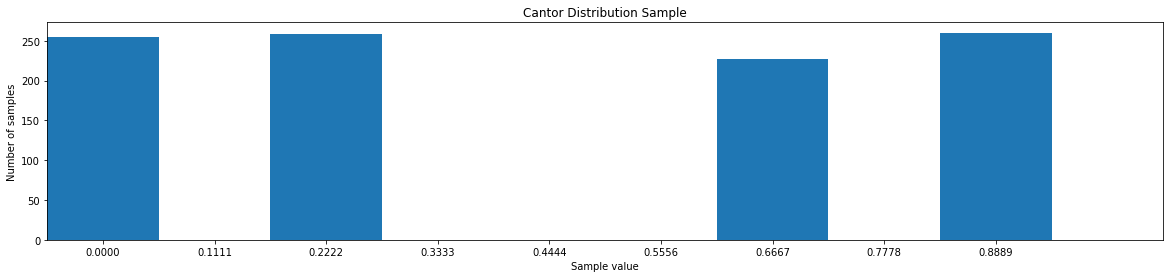

In [39]:
fig, ax1 = plt.subplots(1, 1)
fig.set_figwidth(20)
N = 2
p = 0.5
binwidth = 3**-N
values = [cantor(N, p) for i in range(1000)]
labels, counts = np.unique(values, return_counts=True)
ax1.hist(values, bins=np.arange(0 - binwidth/2, 1 + binwidth/2, binwidth))
ax1.set_xlim([-binwidth/2, 1 + binwidth/2])
ax1.set_xticks(np.arange(0, 1, 3**-N))
ax1.set_title("Cantor Distribution Sample")
ax1.set_xlabel("Sample value")
ax1.set_ylabel("Number of samples")

## Law of Large Numbers

The Law of Large Numbers says that as the number of randomly generated &
identically distributed variables grows, the sample mean approaches the true mean.

Let's simulate this example using a fair dice (values 1-6 have equal chance of appearing).
In our example, the expected value is 3.5 (the average of all the numbers from 1 to 6). So, if we take the average
of our 100 dice results, we should expect it to be close to 3.5.

We test and plot this according to

In [ ]:
# Exercise 4

# Law of large numbers

import pandas as pd
result = []
for n in range(1,25000):
    mean = np.mean(np.random.randint(low = 1, high = 7, size = n))
    result.append(mean)

df = pd.DataFrame({ 'size' : result})

df.plot(legend=None)
plt.title('Law of Large Numbers')

plt.xlabel("Sample size")
plt.ylabel("Sample mean averages")

We can observe that with a smaller sample size, the sample means are spread
around very broadly. As we move right along the x-axis, we see the sample mean average narrowing and converging towards the population mean, 3.5.


In [ ]:
# 3. From one distribution to another

# Exponential Distribution



# fig, ax = plt.subplots(1, 1)
# rv = expon()
# x = np.linspace(expon.ppf(0.01),
#                 expon.ppf(0.99), 100)
# ax.plot(x, rv.pdf(x), 'k-', lw=2)
# r = expon.rvs(size=1000)
# ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
# plt.show()

In [ ]:
# Monte Carlo

numpoints = 1000
simulation = 0
sim_variance = 0

for n in range(numpoints):
    x = [0] * 10
    for i in range(0, 10):
        x[i] = np.random.uniform()
    sum = np.sum(x) + 1 / (pow(2, 20) * np.prod(x))
    exp = np.exp(-1.0 * sum)

    rightProduct = 1
    for i in range(10):
        single_x = pow(x[i], i/11 - 1)
        rightProduct = rightProduct * single_x

    simulation = simulation + exp * rightProduct

inf = 10000
simulation = (simulation * inf) / numpoints
sim_variance = (sim_variance * inf) / numpoints
# error = 6999 * np.sqrt()
print("Monte Carlo Estimation", simulation)
# print("Estimated error", error)